In [70]:
import os

DATA_FOLDER = os.path.abspath(os.path.join('..', 'data'))
FIGURE_FOLDER = os.path.abspath(os.path.join('..', 'figures'))

notebook_name = '022_slice_seqs_to_same_lengths'

data_folder = os.path.join(DATA_FOLDER, notebook_name)
figure_folder = os.path.join(FIGURE_FOLDER, notebook_name)

! mkdir -p $data_folder
! mkdir -p $figure_folder

input_folder = os.path.join(DATA_FOLDER, '021_get_nucleus_cytoplasm_sequences')

In [71]:
ls $input_folder

Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic
Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.target.tsv
Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.target.tsv.test
Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.target.tsv.train
Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.target.tsv.valid
Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.test
Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.train
Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.tsv
Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.valid
Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic
Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.target.tsv
Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.target.tsv.test
Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.target.tsv.train
Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.target.tsv.valid
Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.test
Homo_sapiens.GRCh38.cds.all.fa.nu

## What's the difference between CDS and cDNA datasets?

In [72]:
! head $data_folder/*nuclear_or_cytoplasmic

head: cannot open '/src/myhome/code/sequence-localization/data/022_slice_seqs_to_same_lengths/*nuclear_or_cytoplasmic' for reading: No such file or directory



Search for `ATGTGTGCTGCT`, the very beginning of the CDS. It shows that the CDS is the pure coding sequence (exons only) while the CDNA is the whole CDNA molecule, including introns and UTRs. We want the whole UTRs too.

this means:

- CDS = coding exons only
- cDNA = entire transcript, including UTRs and exons

In [73]:
fastas = ['Homo_sapiens.GRCh38.cdna.all.fa', 'Homo_sapiens.GRCh38.cds.all.fa', 'Homo_sapiens.GRCh38.pep.all.fa']

In [74]:
lengths_series = {}

for fasta in fastas:
    input_fasta = os.path.join(input_folder, fasta + '.nuclear_or_cytoplasmic')
    
    dataset_lengths = pd.Series()
    for i, record in enumerate(SeqIO.parse(input_fasta, "fasta")):
        dataset_lengths[record.id] = len(record)
    lengths_series[fasta] = dataset_lengths
# lengths_series

{'Homo_sapiens.GRCh38.cdna.all.fa': ENST00000419783.2    1151
 ENST00000419349.2    1135
 ENST00000643797.1     708
 ENST00000646881.1     589
 ENST00000496791.1     580
 ENST00000620890.1     897
 ENST00000362079.2     784
 ENST00000361227.2     346
 ENST00000548195.5     576
 ENST00000311317.8    2897
 ENST00000332180.9    5812
 ENST00000550053.5    5819
 ENST00000620430.5    3623
 ENST00000547404.1     719
 ENST00000550613.1     467
 ENST00000548534.1     732
 ENST00000550786.5     633
 ENST00000552203.1     359
 ENST00000551224.1     575
 ENST00000551290.1     307
 ENST00000547171.1     351
 ENST00000550036.1     578
 ENST00000445224.6    1645
 ENST00000461058.5     566
 ENST00000495954.5    1000
 ENST00000483730.1     806
 ENST00000472483.5     765
 ENST00000482804.1    1799
 ENST00000482885.1    5949
 ENST00000475932.1     213
                      ... 
 ENST00000503871.1     369
 ENST00000505977.1     936
 ENST00000523518.1     489
 ENST00000629457.2     340
 ENST00000316045.9  

In [75]:
dfs = []

for name, series in lengths_series.items():
    series.name = 'length'
    df = series.reset_index()
    df['fasta'] = name
    dfs.append(df)
lengths = pd.concat(dfs, ignore_index=True)
lengths.head()

,index,length,fasta
0,ENST00000419783.2,1151,Homo_sapiens.GRCh38.cdna.all.fa
1,ENST00000419349.2,1135,Homo_sapiens.GRCh38.cdna.all.fa
2,ENST00000643797.1,708,Homo_sapiens.GRCh38.cdna.all.fa
3,ENST00000646881.1,589,Homo_sapiens.GRCh38.cdna.all.fa
4,ENST00000496791.1,580,Homo_sapiens.GRCh38.cdna.all.fa


In [76]:
lengths['data_type'] = lengths.fasta.str.split('.').str[2]
lengths.head()

,index,length,fasta,data_type
0,ENST00000419783.2,1151,Homo_sapiens.GRCh38.cdna.all.fa,cdna
1,ENST00000419349.2,1135,Homo_sapiens.GRCh38.cdna.all.fa,cdna
2,ENST00000643797.1,708,Homo_sapiens.GRCh38.cdna.all.fa,cdna
3,ENST00000646881.1,589,Homo_sapiens.GRCh38.cdna.all.fa,cdna
4,ENST00000496791.1,580,Homo_sapiens.GRCh38.cdna.all.fa,cdna


In [77]:
! pip install seaborn

mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.0 requires cython, which is not installed.
hyperopt 0.1 requires future, which is not installed.
hyperas 0.4 requires jupyter, which is not installed.
distributed 1.21.8 requires msgpack, which is not installed.


In [78]:
import seaborn as sns
%matplotlib inline

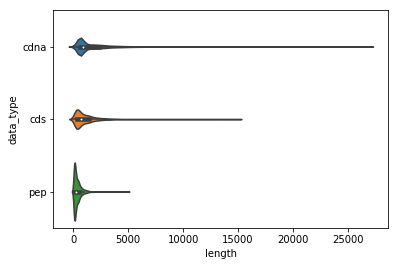

In [79]:
sns.violinplot(x='length', y='data_type', data=lengths)

In [80]:
lengths.groupby('data_type').mean()

,length
data_type,
cdna,1741.786733
cds,1116.373796
pep,371.279532


In [81]:
lengths.groupby('data_type').median()

,length
data_type,
cdna,909
cds,714
pep,237


In [82]:
lengths['log10_length'] = np.log10(lengths.length)

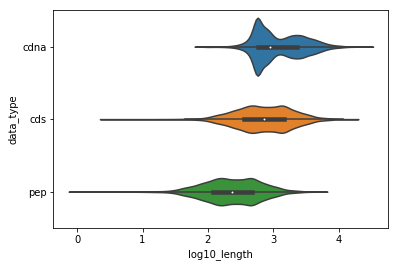

In [83]:
sns.violinplot(x='log10_length', y='data_type', data=lengths)

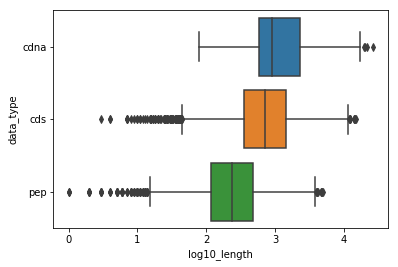

In [84]:
sns.boxplot(x='log10_length', y='data_type', data=lengths)

In [85]:
record

SeqRecord(seq=Seq('MPSEQKQLFCDEKQTTLKKDYDVKNEIVDRSAPKPKISGSIHYALKNVKIDLPK...MLE', SingleLetterAlphabet()), id='ENSP00000481657.1', name='ENSP00000481657.1', description='ENSP00000481657.1 pep chromosome:GRCh38:10:96151409:96163752:1 gene:ENSG00000177853.14 transcript:ENST00000614149.1 gene_biotype:protein_coding transcript_biotype:protein_coding gene_symbol:ZNF518A description:zinc finger protein 518A [Source:HGNC Symbol;Acc:HGNC:29009]', dbxrefs=[])

In [86]:
len(record)

1483

In [91]:
! ls $data_folder

Homo_sapiens.GRCh38.cdna.all.fa.last500  Homo_sapiens.GRCh38.pep.all.fa.last150
Homo_sapiens.GRCh38.cds.all.fa.last450


In [98]:
!rm $data_folder/*

In [99]:
slice_sizes = {'pep': 150, 'cds': 450, 'cdna': 500}
padding_letters = {'pep': "X", 'cds': "N", 'cdna': "N"}

for fasta in fastas: 
    split = fasta.split('.')
    data_type = split[2]
    
    
    slice_size = slice_sizes[data_type]
    padding_letter = padding_letters[data_type]
    
    input_fasta = os.path.join(input_folder, fasta + '.nuclear_or_cytoplasmic')
    target = pd.read_table(input_fasta + '.target.tsv', header=None)
    
    dataset_lengths = pd.Series()
#     first_n = []
    last_n = []
    target_ind = []
    
    for i, record in enumerate(SeqIO.parse(input_fasta, "fasta")):
#         seq = record[:slice_size]
        
        seq = record[-slice_size:]
        if len(seq) == slice_size:
            target_ind.append(i)
            last_n.append(seq)

    
    print(data_type, len(last_n))
    output_fasta = os.path.join(data_folder, os.path.basename(input_fasta) + '.last' + str(slice_size))
    SeqIO.write(last_n, output_fasta, 'fasta')
    
    
    sliced_target = target.loc[target_ind]
    tsv = output_fasta + '.target.tsv'
    sliced_target.to_csv(tsv, sep='\t', header=False, index=False)

cdna 19338
cds 9016
pep 9000


In [100]:
ls $data_folder

Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500
Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500.target.tsv
Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.last450
Homo_sapiens.GRCh38.cds.all.fa.nuclear_or_cytoplasmic.last450.target.tsv
Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150
Homo_sapiens.GRCh38.pep.all.fa.nuclear_or_cytoplasmic.last150.target.tsv


In [101]:
! head $data_folder/*

==> /src/myhome/code/sequence-localization/data/022_slice_seqs_to_same_lengths/Homo_sapiens.GRCh38.cdna.all.fa.nuclear_or_cytoplasmic.last500 <==
>ENST00000419783.2 cdna chromosome:GRCh38:3:49357171:49358600:-1 gene:ENSG00000233276.4 gene_biotype:polymorphic_pseudogene transcript_biotype:protein_coding gene_symbol:GPX1 description:glutathione peroxidase 1 [Source:HGNC Symbol;Acc:HGNC:4553]
GCTCTTCGAGAAGTGCGAGGTGAACGGTGCGGGGGCGCACCCTCTCTTCGCCTTCCTGCG
GGAGGCCCTGCCAGCTCCCAGCGACGACGCCACCGCGCTTATGACCGACCCCAAGCTCAT
CACCTGGTCTCCGGTGTGTCGCAACGATGTTGCCTGGAACTTTGAGAAGTTCCTGGTGGG
CCCTGACGGTGTGCCCCTACGCAGGTACAGCCGCCGCTTCCAGACCATTGACATCGAGCC
TGACATCGAAGCCCTGCTGTCTCAAGGGCCCAGCTGTGCCTAGGGCGCCCCTCCTACCCC
GGCTGCTTGGCAGTTGCAGTGCTGCTGTCTCGGGGGGGTTTTCATCTATGAGGGTGTTTC
CTCTAAACCTACGAGGGAGGAACACCTGATCTTACAGAAAATACCACCTCGAGATGGGTG
CTGGTCCTGTTGATCCCAGTCTCTGCCAGACCAAGGCGAGTTTCCCCACTAATAAAGTGC
CGGGTGTCAGCAGAACTGTG

==> /src/myhome/code/sequence-localization/data/022_slice_seqs_to_same_lengths/Homo_sapiens.GRCh3